In [ ]:
%pip install scikit-learn==1.5.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gaussian_kde
from sklearn.neighbors import KernelDensity

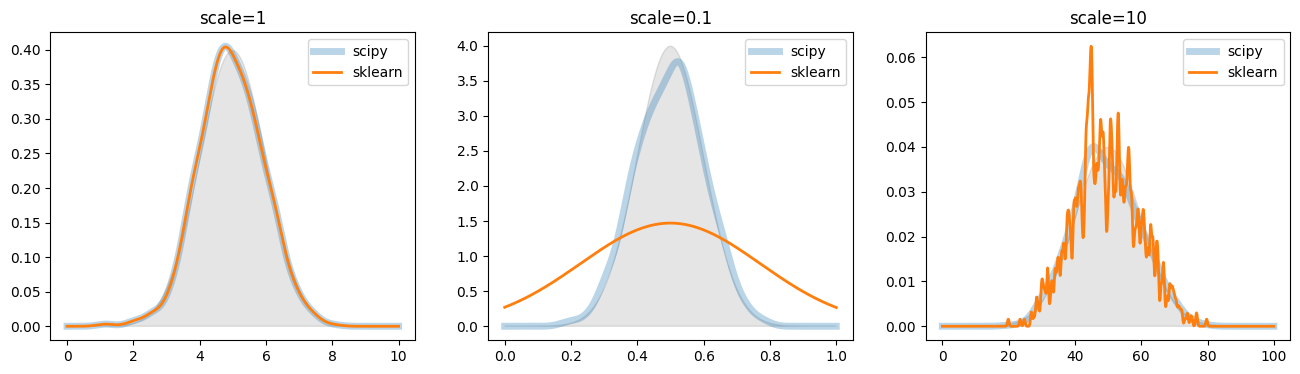

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
rng = np.random.default_rng(0)

for ax, scale in zip(axes, [1, 0.1, 10]):
    data = rng.normal(5 * scale, scale, 1000)
    xs = np.linspace(0, 10 * scale, 1000)
    ref = norm(5 * scale, scale).pdf(xs)

    kd_scipy = gaussian_kde(data, bw_method="scott")
    result_scipy = kd_scipy.pdf(xs)

    kd_sklearn = KernelDensity(bandwidth="scott").fit(data.reshape(-1, 1))
    result_sklearn = np.exp(kd_sklearn.score_samples(xs.reshape(-1, 1)))

    ax.plot(xs, result_scipy, label=f"scipy", lw=5, alpha=0.3)
    ax.plot(xs, result_sklearn, label=f"sklearn", lw=2)
    ax.fill(xs, ref, color="black", alpha=0.1)
    ax.set_title(f"{scale=}")
    ax.legend()

plt.show()